In [4]:
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import neighbors as ns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
# To ignore the UserWarnings that The least populated class in y has only 1 members, which is less than n_splits=5. because some target class has only one sample.
import warnings
warnings.simplefilter('ignore')

In [5]:
dataset = pd.read_csv('Downloads/abalone.csv', names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings'])

In [6]:
print(dataset)

     Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0      M   0.455     0.365   0.095        0.5140          0.2245   
1      M   0.350     0.265   0.090        0.2255          0.0995   
2      F   0.530     0.420   0.135        0.6770          0.2565   
3      M   0.440     0.365   0.125        0.5160          0.2155   
4      I   0.330     0.255   0.080        0.2050          0.0895   
...   ..     ...       ...     ...           ...             ...   
4172   F   0.565     0.450   0.165        0.8870          0.3700   
4173   M   0.590     0.440   0.135        0.9660          0.4390   
4174   M   0.600     0.475   0.205        1.1760          0.5255   
4175   F   0.625     0.485   0.150        1.0945          0.5310   
4176   M   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  Shell weight  Rings  
0             0.1010        0.1500     15  
1             0.0485        0.0700      7  
2             0.1415        0.2100      9  
3      

In [7]:
# To confirm that there are no missing values in the given dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Checking if there is any missing data

We know that there are total 4177 rows in the dataset, from the above results we can conclude that there are 4177 non null values for all the 9 Columns that means there is no missing data.

In [8]:
# To check if there are any duplicate values we dropped all the duplicates and saw that the no. of rows are still 4177 that means there are no duplicates in the given dataset
dataset = dataset.drop_duplicates()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 326.3+ KB


# Computing the moments or summarization statistics on the data features (mean, median, variance, skew, kurtosis), to see if they highlight anything interesting about the different features.



In [9]:
# To check the descriptive statistics of the given data
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [10]:
#Checking the median of the data
dataset_median = dataset.median()
print(dataset_median)

Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64


In [11]:
# Checking the skewness of the data
dataset_skew = dataset.skew(axis=0)
print(dataset_skew)

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64


In [12]:
# Checking the Kurtosis of the data
dataset_kurtosis = dataset.kurt(axis=0)
print(dataset_kurtosis)

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole weight      -0.023644
Shucked weight     0.595124
Viscera weight     0.084012
Shell weight       0.531926
Rings              2.330687
dtype: float64


In [13]:
# To check the variance of the given data
dataset_variance = np.var(dataset,axis=0)
print(dataset_variance)

Length             0.014419
Diameter           0.009846
Height             0.001749
Whole weight       0.240424
Shucked weight     0.049256
Viscera weight     0.012012
Shell weight       0.019373
Rings             10.392777
dtype: float64


Skewness:- We can see that feature 'Height' and target 'Rings' are highly skewed and the skewness of both 'Height' and 'Rings' are postive values that means the tail of the distribution will be longer towards the right hand side of the distribution. We can also observe that other features are moderately skewed, and the negative skew value of features 'Length' and 'Diameter'indicates that the tail of the distribution will be longer towards the left hand side of the distribution. 

Kurtosis:- It can be observed from the above results for Kurtosis that the negative values of Kurtosis for features 'Diameter' and 'Whole Weight' indicates that their distribution is kind of flat i.e. 'platykurtic'. But, the negative values of Kurtosis for features 'Diameter' and 'Whole Weight' is also very close to zero, that means their distribution is close to a normal distribution. The positive values of Kurtosis for features 'Length','Height','Shucked weight, 'Viscera weight','Shell weight' and the target 'Rings' indicates that their disrtibution is tall and thin i.e. 'Leptokurtic'.

It can be observed from the values of kurtosis that distribuion of the features 'Length', 'Diameter', 'Whole weight', 'Viscera weight' is close to a normal distribution as the values of their Kurtosis is close to 0. Also it can be observed that the value of kurtosis for feature 'Height' is very high, that means the data for 'Height' has very heavy outliers.

The above conclusion can also be observed in the first pairplot below.

# Using a pairsplot to look at the whole of the datset.

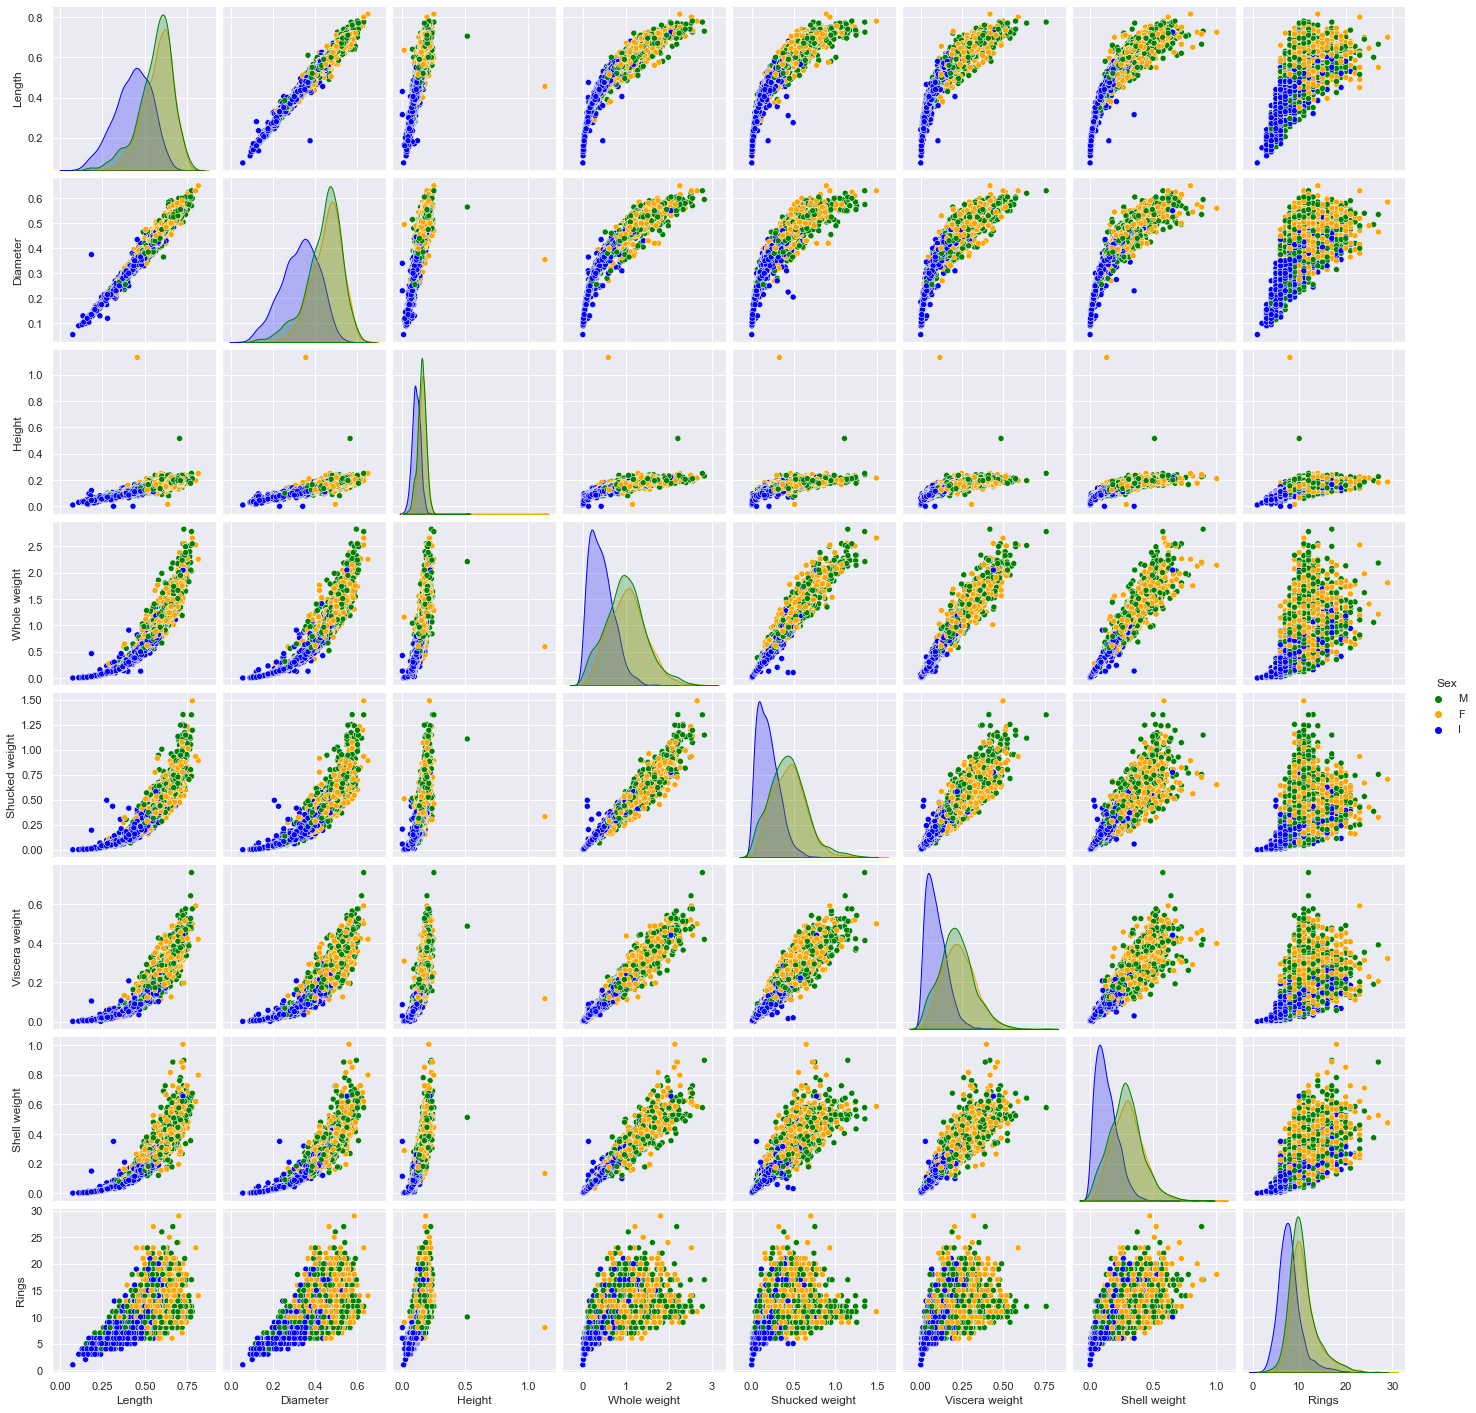

In [17]:
# To check the correlation of different features
seaborn.set(rc={'figure.figsize':(15,10)})
seaborn.pairplot(dataset, hue='Sex', palette= ['green', 'orange', 'blue'])
plt.show()

<AxesSubplot:>

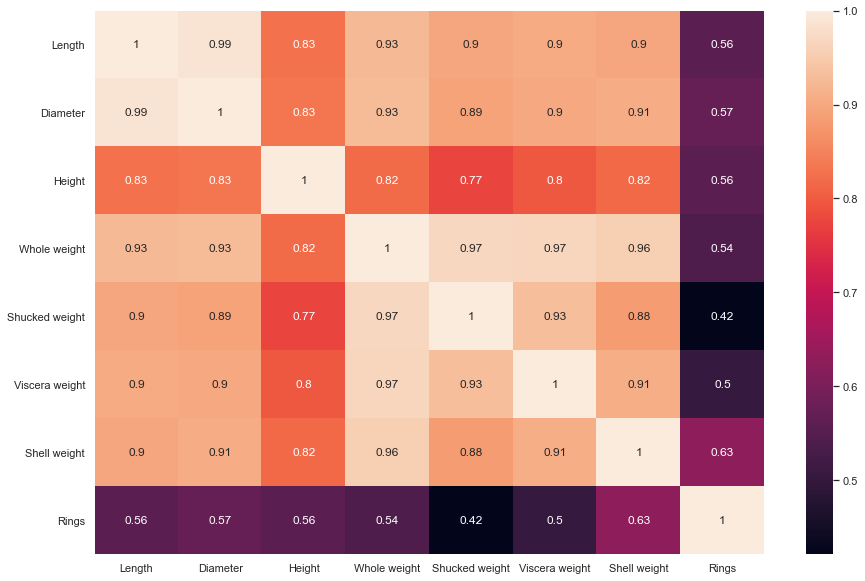

In [18]:
seaborn.heatmap(dataset.corr(), annot=True)

From the pairplot, it can be observed that the plot for length vs diameter is linear and hence it can be concluded that Length and Diameter are highly correlated. Similarly Length and Height are co related and also Whole weight, Shucked weight, Viscera weight and shell Weight are also corelated.

From the above heatmap it can be concluded that the features that seem important are 'Length','Diameter', 'Height' and 'Shell Weight', since these features have a strong corelation (compared to other features) with the target 'Rings'. The pairplot for the important features and the target can be seen below.

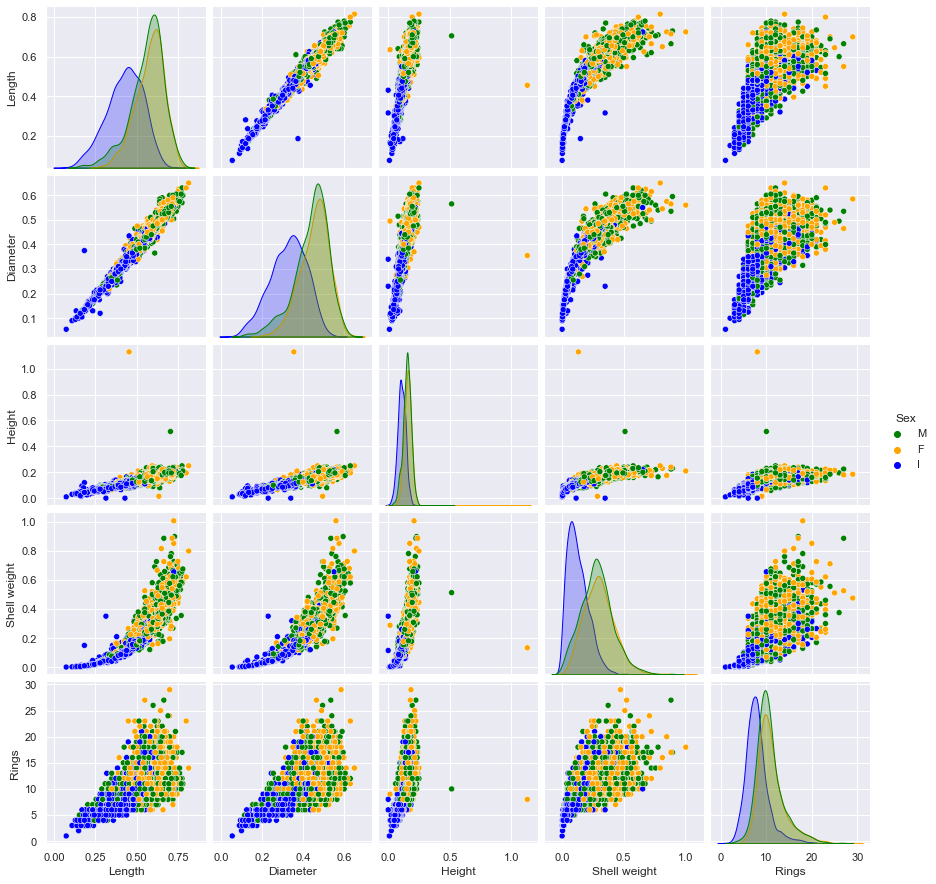

In [19]:
seaborn.pairplot(dataset.drop(['Whole weight','Shucked weight','Viscera weight'],axis=1), hue='Sex', palette= ['green', 'orange', 'blue'])
plt.show()

<AxesSubplot:xlabel='Rings', ylabel='Length'>

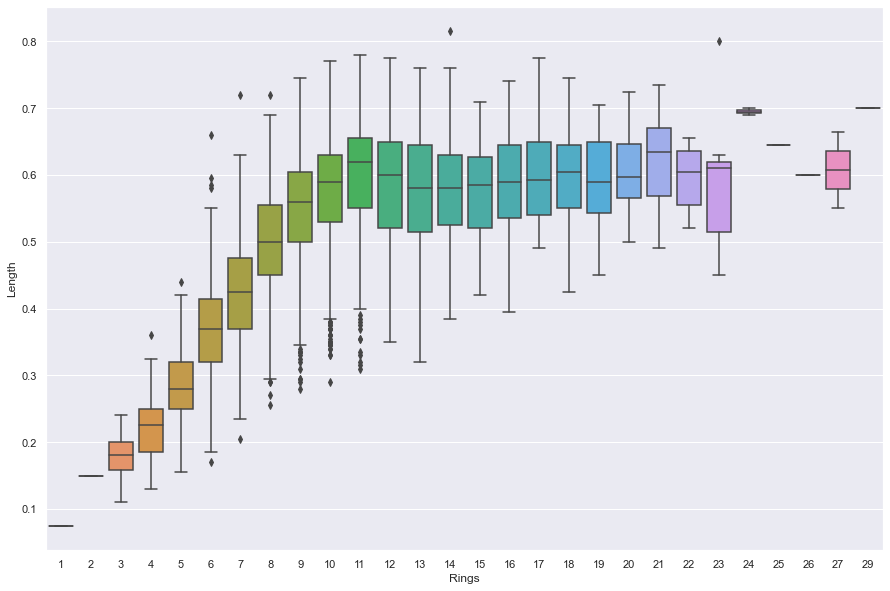

In [20]:
seaborn.boxplot(x='Rings', y= 'Length', data = dataset)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

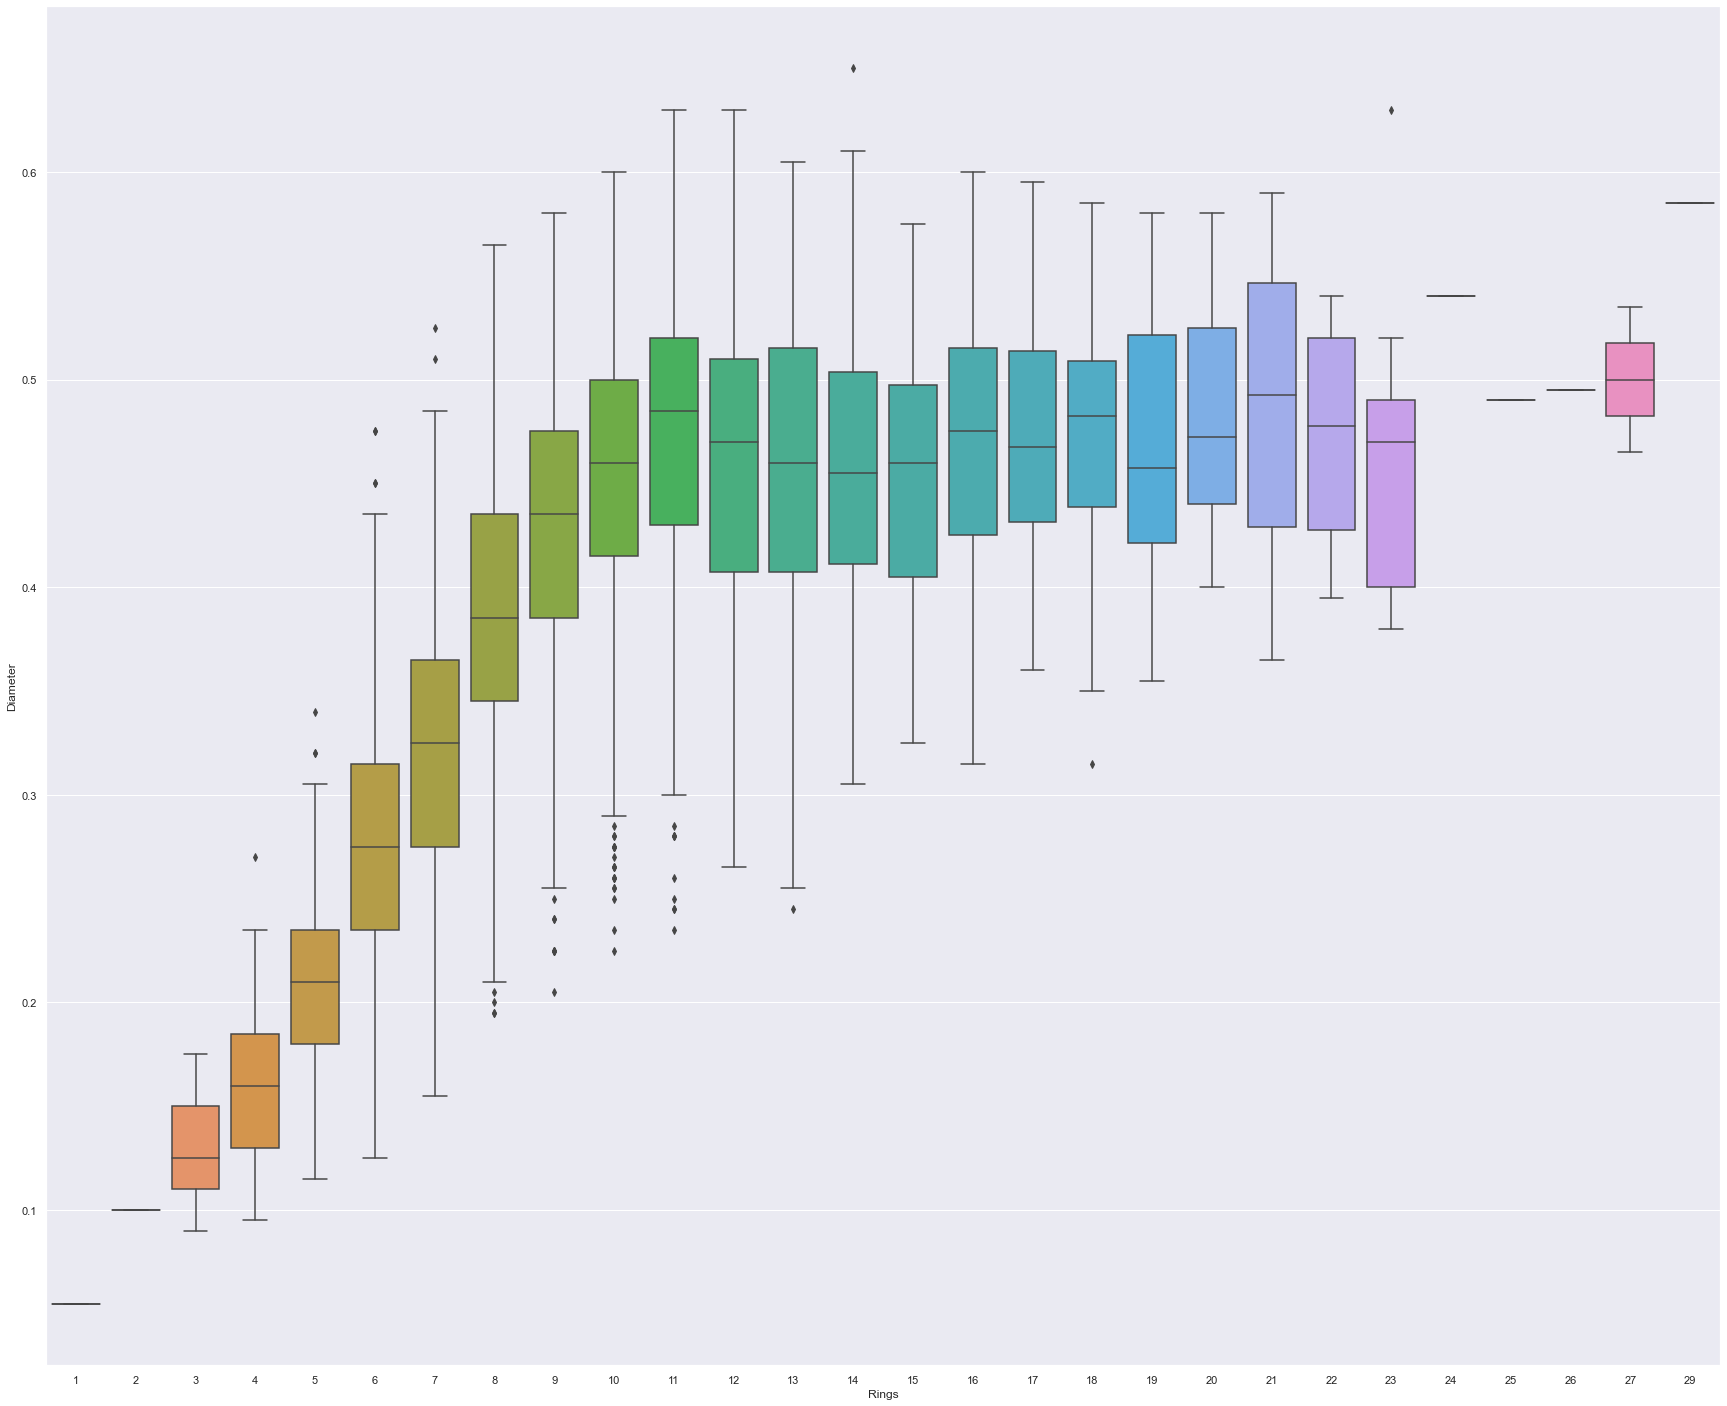

In [21]:
seaborn.set(rc={'figure.figsize':(30,25)})
seaborn.boxplot(x='Rings', y= 'Diameter', data = dataset)

<AxesSubplot:xlabel='Rings', ylabel='Height'>

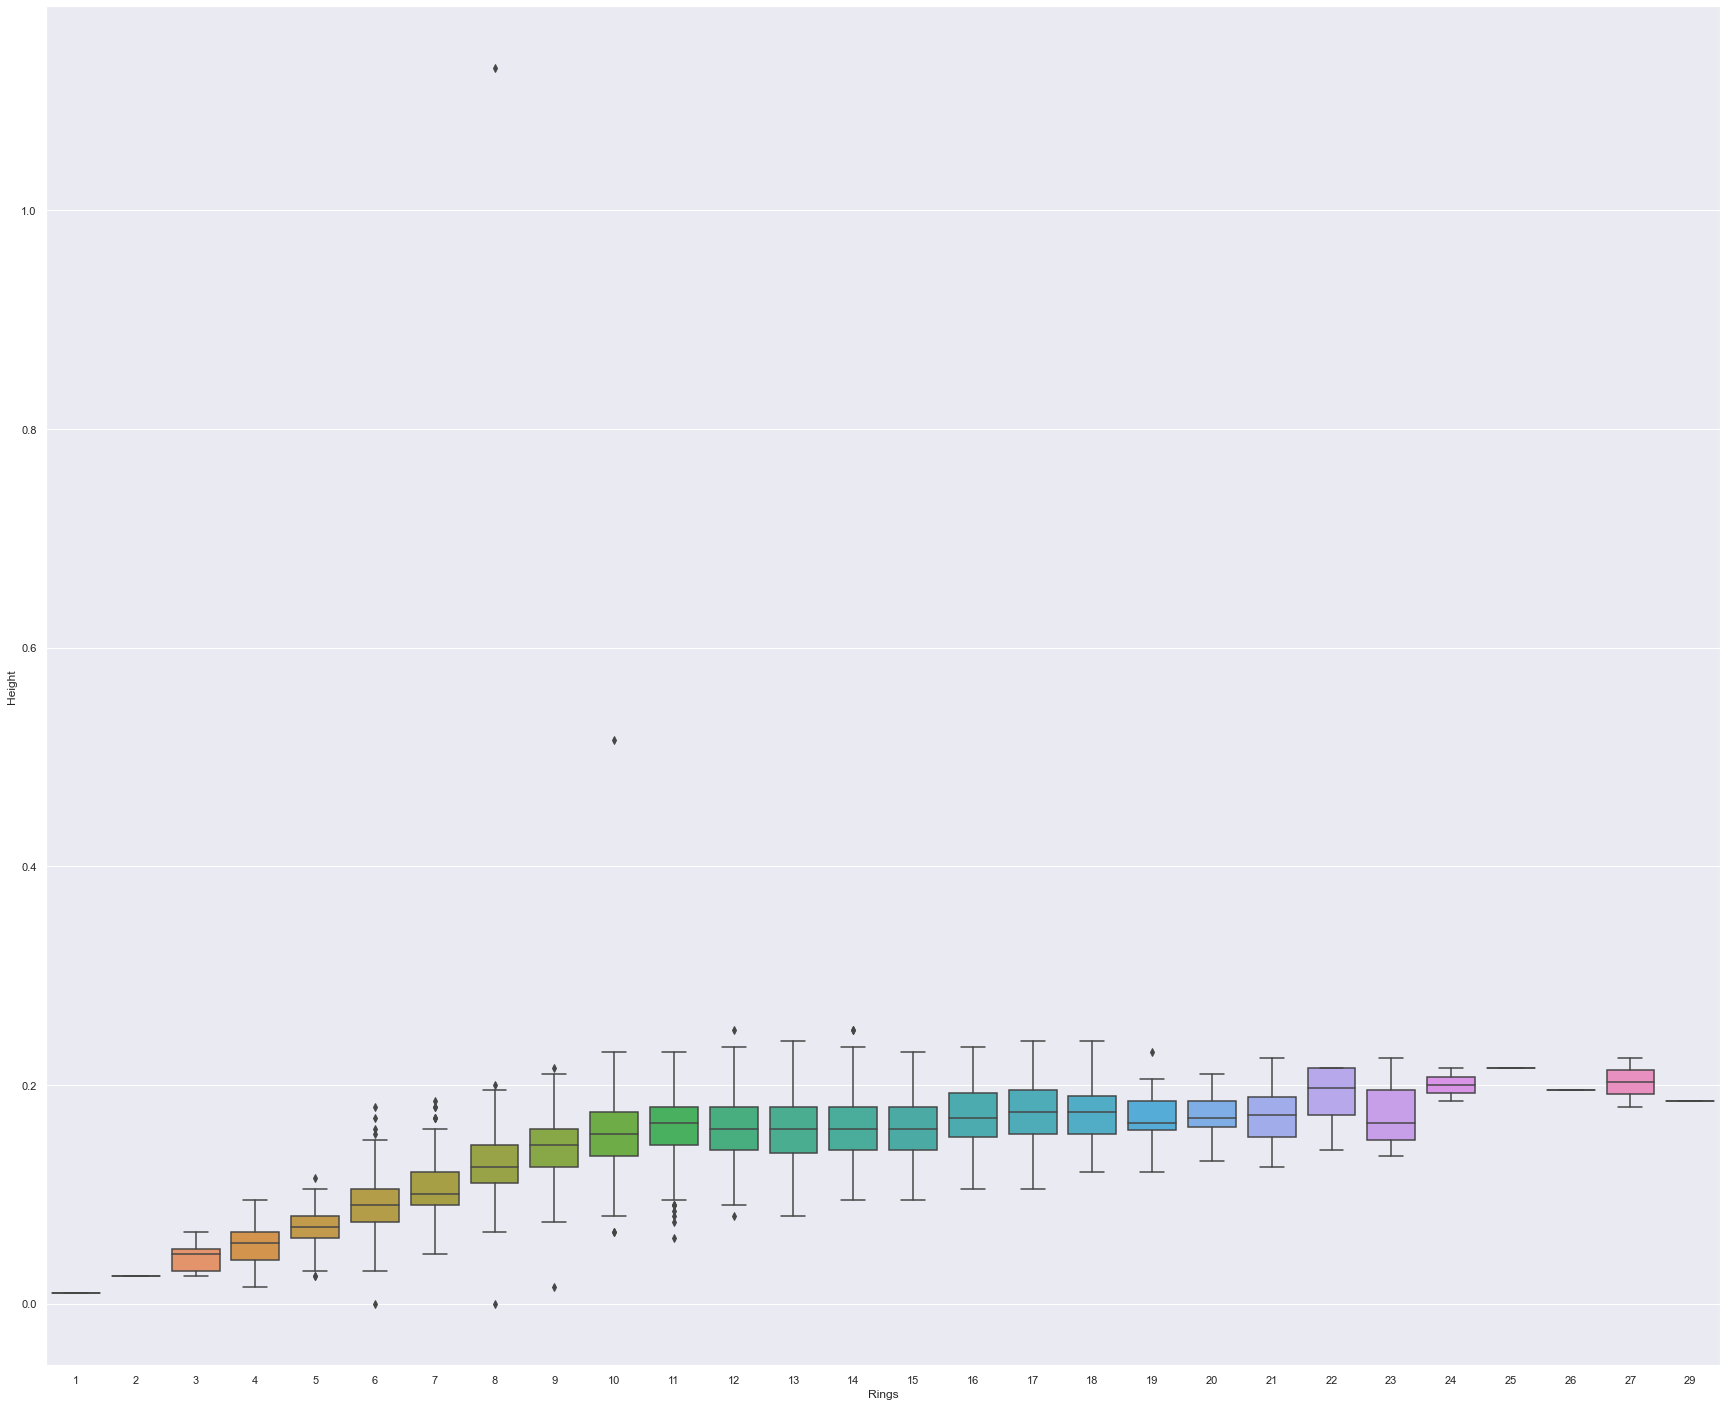

In [22]:
seaborn.set(rc={'figure.figsize':(30,25)})
seaborn.boxplot(x='Rings', y= 'Height', data = dataset)

Here , it can be observed that there are heavy outliers for the feature 'Height'

<AxesSubplot:xlabel='Rings', ylabel='Shell weight'>

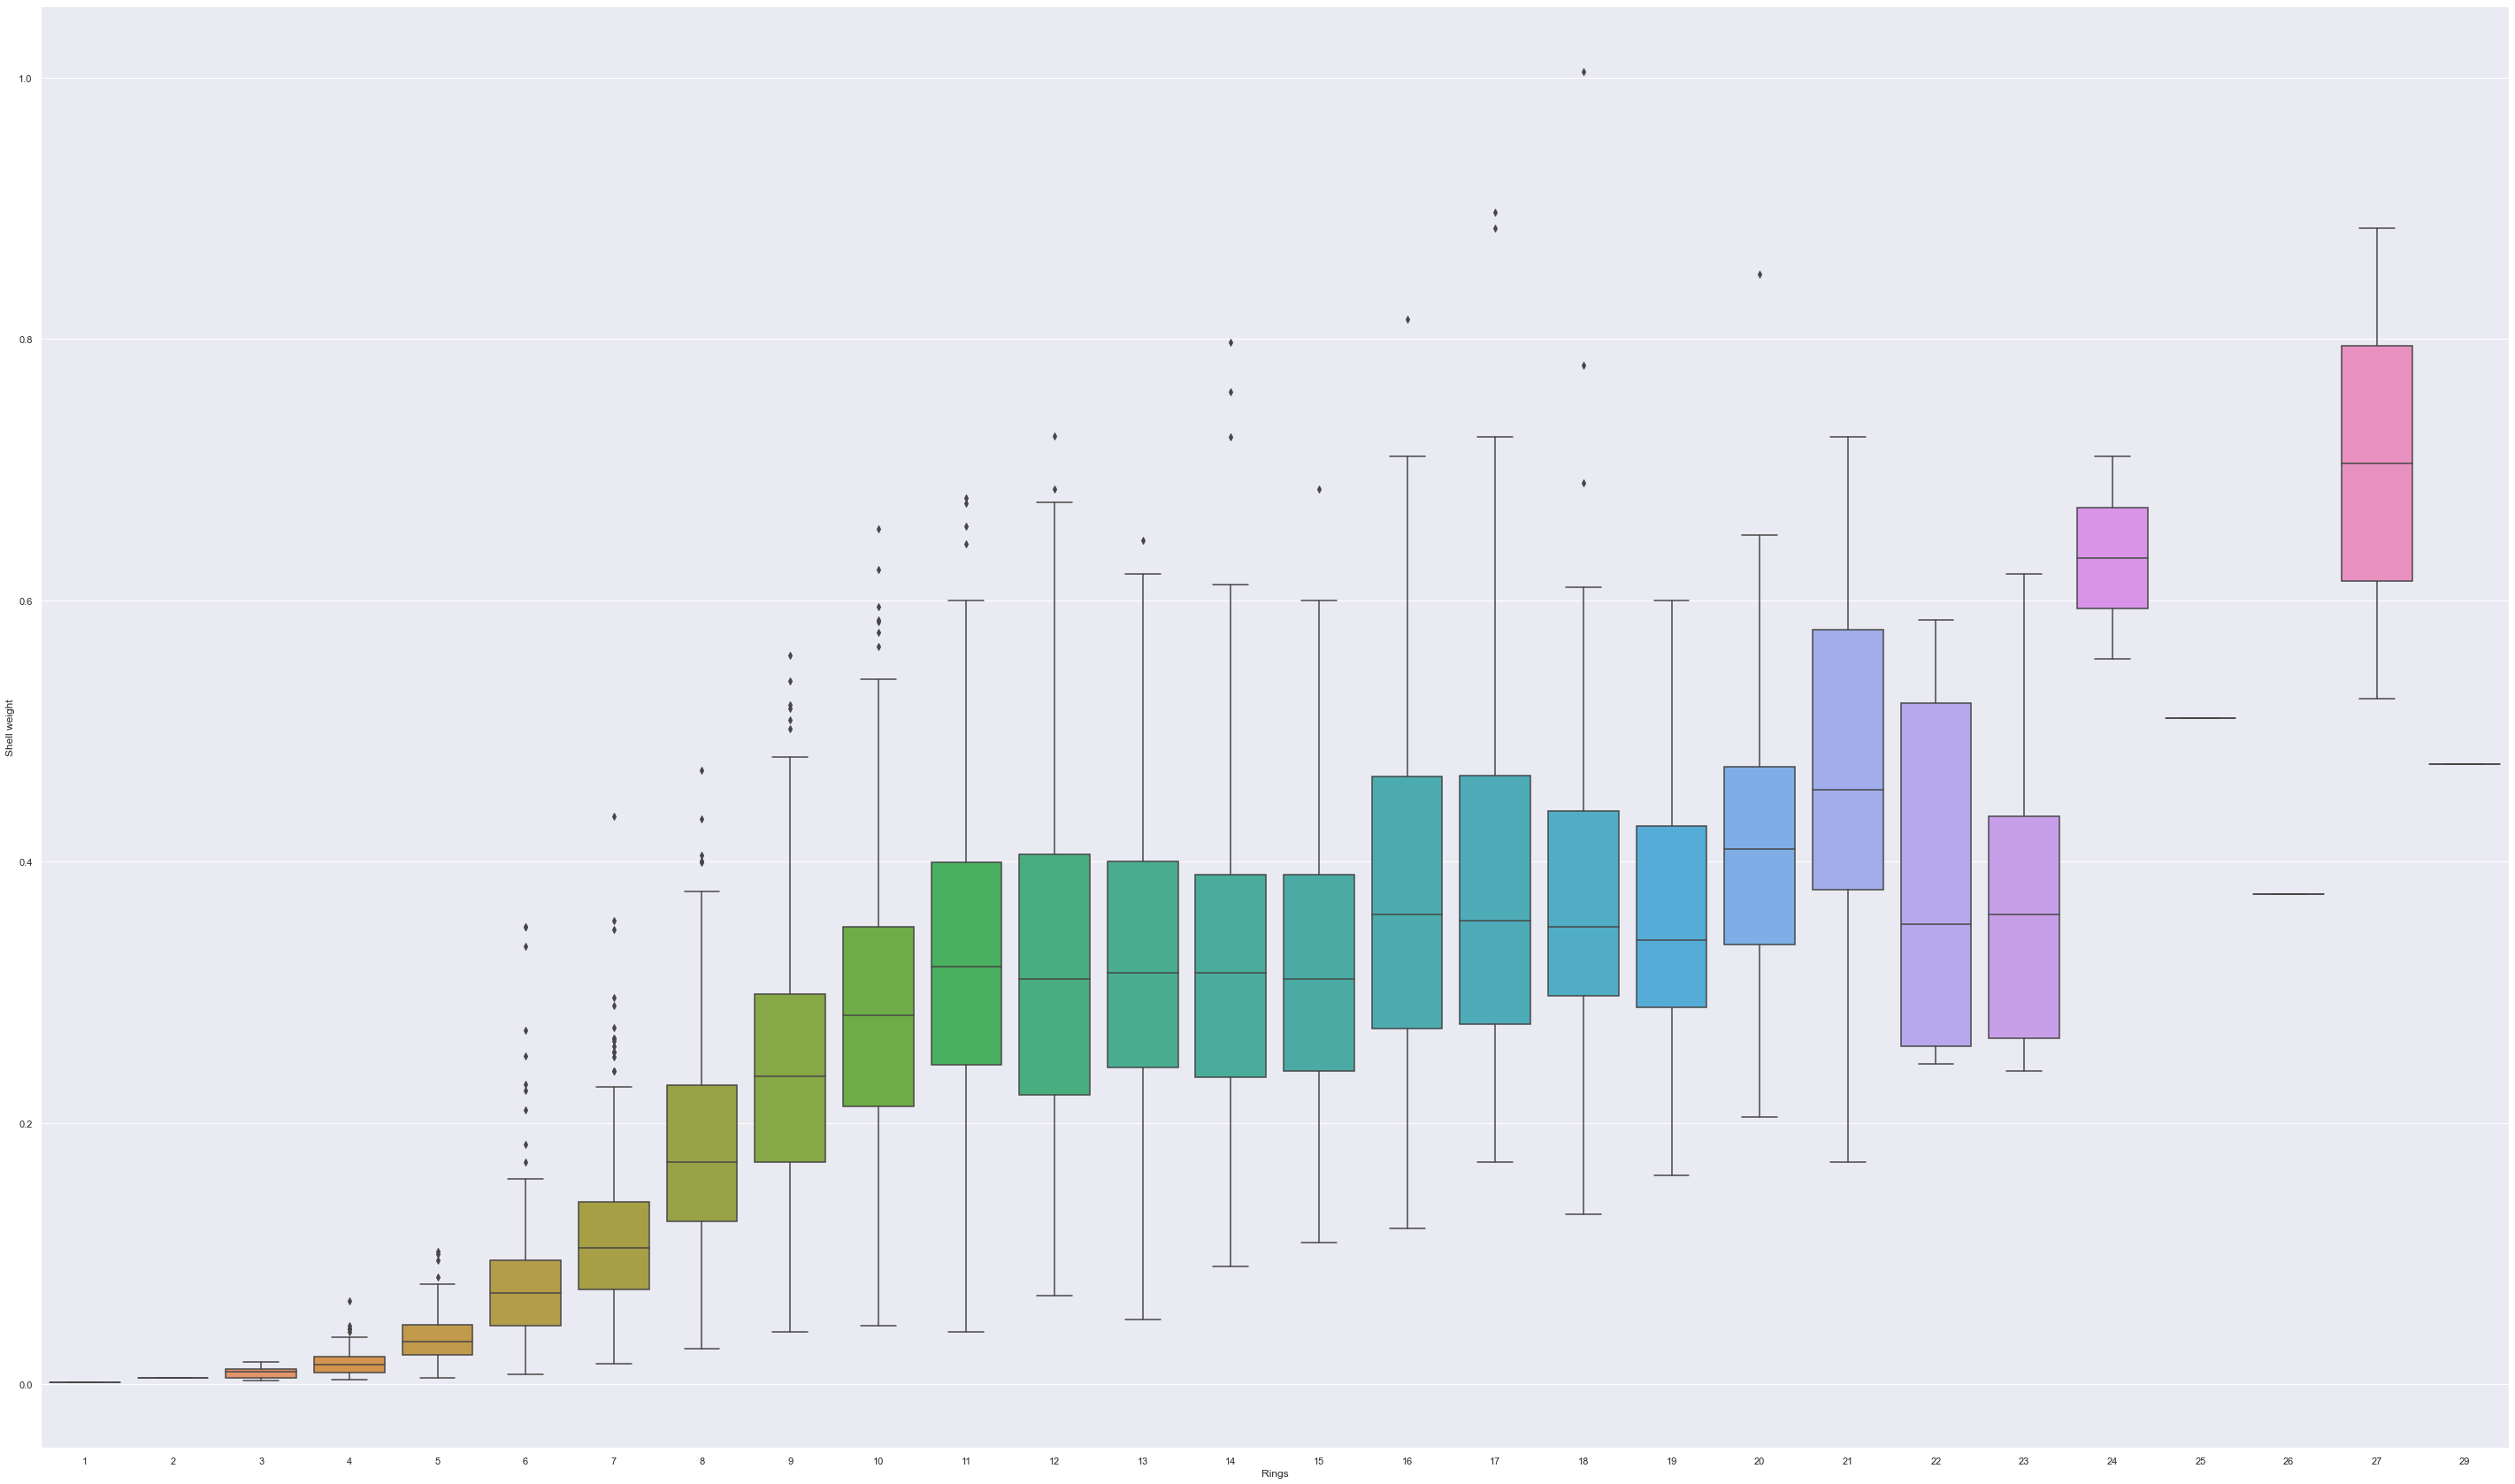

In [23]:
seaborn.set(rc={'figure.figsize':(50,30)})
seaborn.boxplot(x='Rings', y= 'Shell weight', data = dataset)

<AxesSubplot:xlabel='Rings', ylabel='Diameter'>

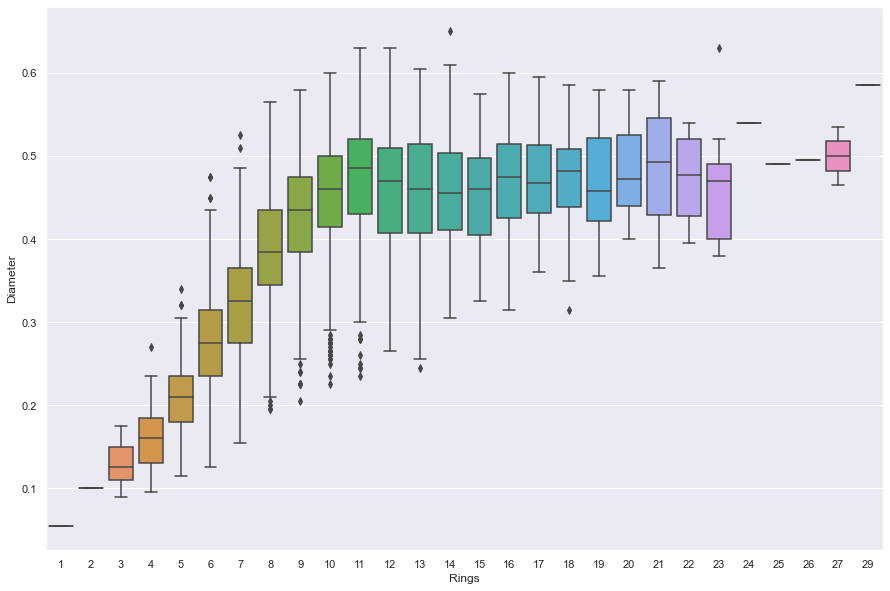

In [24]:
seaborn.set(rc={'figure.figsize':(15,10)})
seaborn.boxplot(x='Rings', y= 'Diameter', data = dataset)

26      1
25      1
2       1
29      1
1       1
24      2
27      2
22      6
23      9
21     14
3      15
20     26
19     32
18     42
4      57
17     58
16     67
15    103
5     115
14    126
13    203
6     259
12    267
7     391
11    487
8     568
10    634
9     689
Name: Rings, dtype: int64

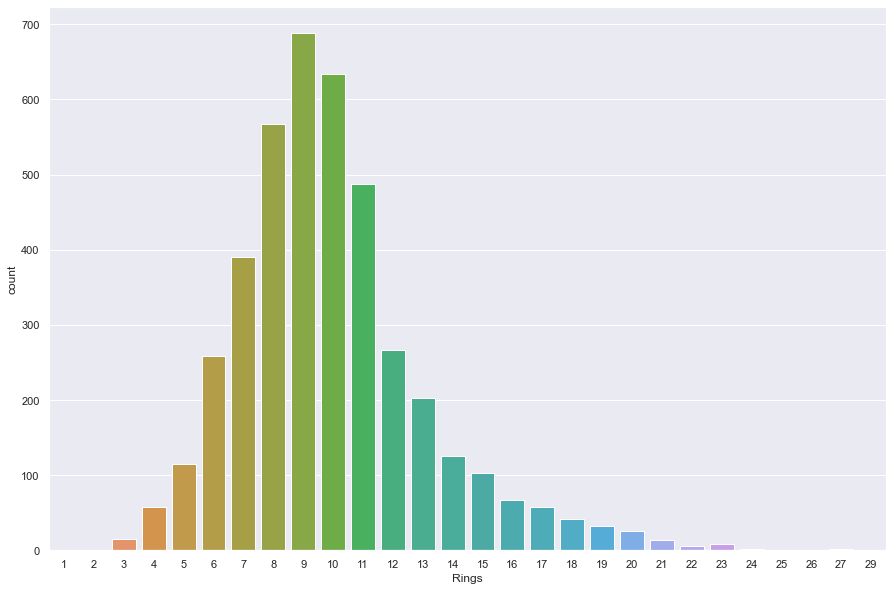

In [25]:
# To Check if the dataset is balanced or imbalanced
seaborn.countplot(data=dataset,x=dataset['Rings'])
dataset['Rings'].value_counts(ascending=True)

As can be seen from the above distribution for the Rings, it can be seen that it is skewed slightly to the left, hence this is an imbalanced dataset. But this dataset is not very much imbalanced and hence there is not much need to apply any correction to the dataset.

In [26]:
# To get the total count for different sex
dataset['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [27]:
# OneHotEncoding of categorical data
dataset_encoded = pd.get_dummies(data = dataset)
print(dataset_encoded)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0      0.455     0.365   0.095        0.5140          0.2245          0.1010   
1      0.350     0.265   0.090        0.2255          0.0995          0.0485   
2      0.530     0.420   0.135        0.6770          0.2565          0.1415   
3      0.440     0.365   0.125        0.5160          0.2155          0.1140   
4      0.330     0.255   0.080        0.2050          0.0895          0.0395   
...      ...       ...     ...           ...             ...             ...   
4172   0.565     0.450   0.165        0.8870          0.3700          0.2390   
4173   0.590     0.440   0.135        0.9660          0.4390          0.2145   
4174   0.600     0.475   0.205        1.1760          0.5255          0.2875   
4175   0.625     0.485   0.150        1.0945          0.5310          0.2610   
4176   0.710     0.555   0.195        1.9485          0.9455          0.3765   

      Shell weight  Rings  Sex_F  Sex_I

Here we applied One Hot Encoding for the categorical data - 'Sex'

In [28]:
# To Check if the OneHotEncoding is done properly or not i.e. the total quantity of male, female and infant are the same as in the original dataset
a=dataset_encoded['Sex_F'].value_counts()
print(a)
b=dataset_encoded['Sex_M'].value_counts()
print(b)
c=dataset_encoded['Sex_I'].value_counts()
print(c)

0    2870
1    1307
Name: Sex_F, dtype: int64
0    2649
1    1528
Name: Sex_M, dtype: int64
0    2835
1    1342
Name: Sex_I, dtype: int64


It can be seen that the number of male is 1528, female is 1307 and infant is 1342 and they are the same as in the original dataset.

In [29]:
#To Check the datatypes of all the columns to check if there are any non-numerical data present
dataset_encoded.dtypes

Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
Sex_F               uint8
Sex_I               uint8
Sex_M               uint8
dtype: object

# Normalizing the data using z-score normalization.

In [30]:
#Applying z-score normalisation
dataset_zsn_intermediate = dataset_encoded.drop(['Rings'],axis=1)
dataset_zsn_intermediate = dataset_zsn_intermediate.select_dtypes(include='number')
dataset_zsn = dataset_zsn_intermediate.apply(stats.zscore)
dataset_zsn['Rings'] = dataset_encoded['Rings']
print(dataset_zsn)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0    -0.574558 -0.432149 -1.064424     -0.641898       -0.607685   
1    -1.448986 -1.439929 -1.183978     -1.230277       -1.170910   
2     0.050033  0.122130 -0.107991     -0.309469       -0.463500   
3    -0.699476 -0.432149 -0.347099     -0.637819       -0.648238   
4    -1.615544 -1.540707 -1.423087     -1.272086       -1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686 -0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight     Sex_F     Sex_I     Sex_M  Rings  
0          -0.726212     -0.638217 -0.674834 -0.688018  1.316677     15  
1          -1.205221     -1.212987 

In [31]:
# To Check if the mean is 0 and Standard Deviation is 1 for all columns after applying z-score normalisation
dataset_zsn.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
count,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4.177000e+03,4177.000000
mean,-5.834718e-16,-3.027929e-16,3.912493e-16,9.185853e-17,-1.020650e-17,2.704723e-16,2.976897e-16,-4.252710e-17,-7.144552e-17,1.169495e-17,9.933684
std,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,1.000120e+00,3.224169
min,-3.739154e+00,-3.556267e+00,-3.335953e+00,-1.686092e+00,-1.614731e+00,-1.643173e+00,-1.705134e+00,-6.748338e-01,-6.880179e-01,-7.594876e-01,1.000000
25%,-6.161975e-01,-5.833158e-01,-5.862075e-01,-7.897577e-01,-7.811585e-01,-7.946415e-01,-7.819095e-01,-6.748338e-01,-6.880179e-01,-7.594876e-01,8.000000
50%,1.749513e-01,1.725193e-01,1.156329e-02,-5.963767e-02,-1.052891e-01,-8.753202e-02,-3.470794e-02,-6.748338e-01,-6.880179e-01,-7.594876e-01,9.000000
75%,7.579031e-01,7.267984e-01,6.093341e-01,6.613049e-01,6.426730e-01,6.606355e-01,6.478319e-01,1.481846e+00,1.453451e+00,1.316677e+00,11.000000
max,2.423480e+00,2.440025e+00,2.368329e+01,4.072271e+00,5.085388e+00,5.286500e+00,5.504642e+00,1.481846e+00,1.453451e+00,1.316677e+00,29.000000


This way we did the z score normalisation

In [32]:
x=dataset_zsn.iloc[:,0:10]
y=dataset_zsn.iloc[:,10]

# Starting by training the model with the classiffier's default parameters using the training set and test the model with the test set.

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [38]:
neighbor = ns.KNeighborsClassifier()
neighbor.fit(x_train,y_train)
predicted_class = neighbor.predict(x_test)
accuracy = metrics.accuracy_score(y_test,predicted_class)
print(accuracy)

0.22488038277511962


We first split the dataset into train set and test set using the default parameters for train_test_split function, then we used the KNN classifier's default parameters to train the dataset. The accuracy obtained is around 0.22488.

# Divide the data into Training and Testing sets in the ratio 80%/20%.

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 15)

Here we set the test size to 0.2 that means the dataset is split into 20% of the dataset being in test set and the remaining 80% in training data

# Test a range of values for the KNN parameter k using 5 fold cross validation on the training set

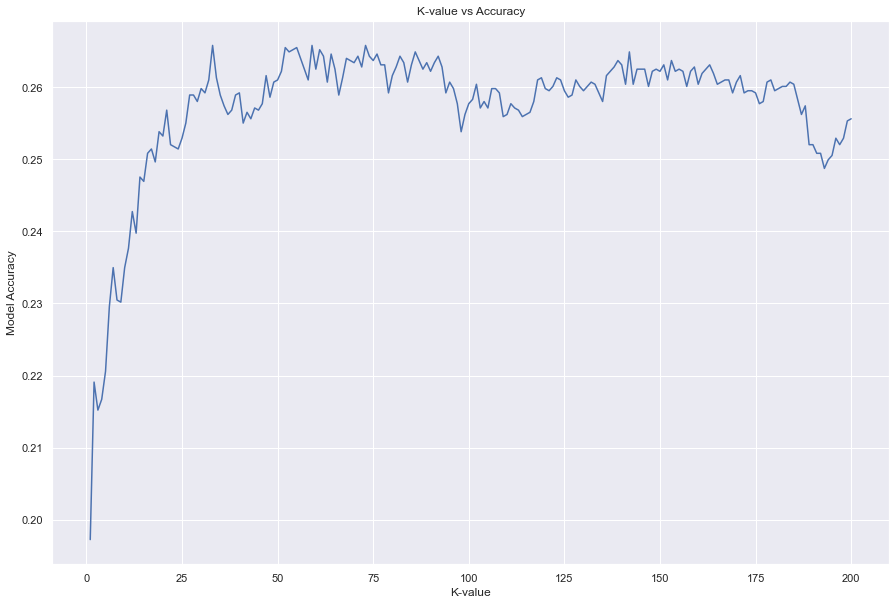

                                                Mean Validation Accuracy vs k                                                
Maximum Accuracy =  0.2657872595615943


In [51]:
accuracy = []
k=1
while k<=200:
        neighbor = ns.KNeighborsClassifier(n_neighbors= k )       
        accuracy_scores=cross_val_score(neighbor,x_train,y_train,cv=5,scoring='accuracy')
        accuracy.append(accuracy_scores.mean())
        k=k+1

k_value=np.array(range(1,201))

plt.plot(k_value,accuracy)
plt.xlabel('K-value')
plt.ylabel('Model Accuracy')
plt.title('K-value vs Accuracy')
plt.show()


string='Mean Validation Accuracy vs k'
print(string.center(125))
print('Maximum Accuracy = ', max(accuracy))


We did the 5 fold cross validation and it can be seen from the above results the maximum accuracy is around 0.266

In [52]:
k_value_plot = pd.DataFrame(accuracy,k_value,columns=['Accuracy'])
k_value_plot.loc[k_value_plot.Accuracy == max_accuracy]

,Accuracy
33,0.265787


Thus we can observe that the max value of accuracy occurs at k=33.

# Using the optimum k value and calculating accuracy on the held out test set.

In [54]:
neighbor = ns.KNeighborsClassifier(n_neighbors= 33 ,weights='uniform',algorithm='auto')
neighbor.fit(x_train,y_train)
predicted_class = neighbor.predict(x_test)
accuracy = metrics.accuracy_score(y_test,predicted_class)
print('Accuracy = ',accuracy)

Accuracy =  0.2511961722488038


Earlier we saw that the maximum accuracy occurs at k=33, hence we used the KNN with the optimum value of k i.e.k=33 and it can be observed that the accuracy on the held out test set is around 0.251

# Computing the values on Test set using the other weighting methods

In [55]:
neighbor = ns.KNeighborsClassifier(n_neighbors= 33 ,weights='distance',algorithm='auto',metric='manhattan')
neighbor.fit(x_train,y_train)
predicted_class = neighbor.predict(x_test)
accuracy = metrics.accuracy_score(y_test,predicted_class)
print('Accuracy using the method of weighted KNN = ',accuracy)

Accuracy using the method of weighted KNN =  0.2535885167464115


Using our chosen value of k i.e. k=33, the accuracy on the test set is around 0.254 when we used distance weighted KNN and used the Manhattan distance

In [70]:
# As default value of p in KNeighborsClassifier is 2, metric='minkowski' gives the distance as Euclidean distance.
neighbor = ns.KNeighborsClassifier(n_neighbors= 33 ,weights='distance',algorithm='auto',metric='minkowski')
neighbor.fit(x_train,y_train)
predicted_class = neighbor.predict(x_test)
accuracy = metrics.accuracy_score(y_test,predicted_class)
print('Accuracy using the method of weighted KNN = ',accuracy)

Accuracy using the method of weighted KNN =  0.25239234449760767


Using our chosen value of k i.e. k=33, the accuracy on the test set is around 0.252 when we used distance weighted KNN and used the Euclidean distance

In [71]:
def model(distance_metric):
    model_accuracy=[]
    k=1
    while k<=200:
        neighbor = ns.KNeighborsClassifier(n_neighbors= k ,weights='distance',algorithm='auto',metric=distance_metric)
        neighbor.fit(x_train,y_train)
        predicted_class = neighbor.predict(x_test)
        accuracy = metrics.accuracy_score(y_test,predicted_class)
        model_accuracy.append(accuracy)
        k=k+1
    return(model_accuracy)

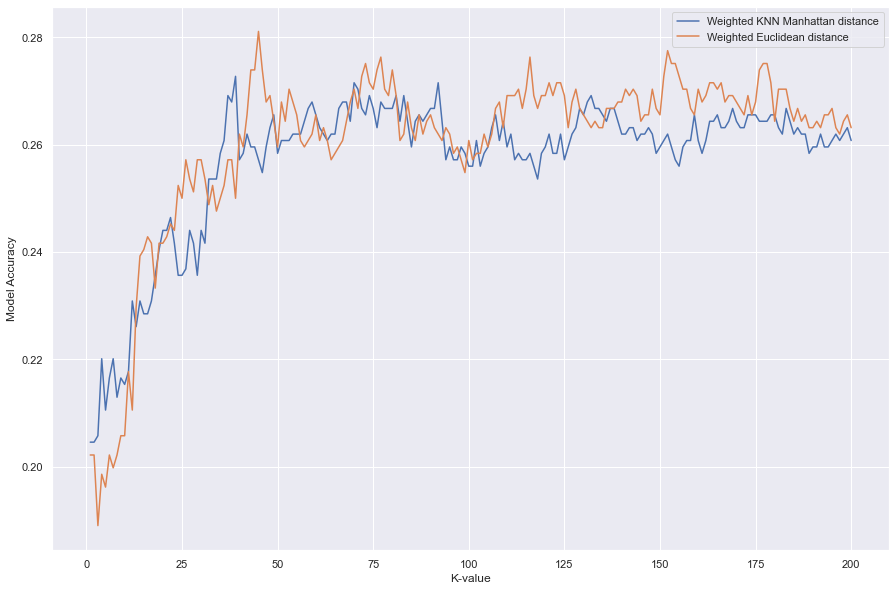

In [76]:
accuracy_manhattan=model(distance_metric='manhattan')
accuracy_euclidean=model(distance_metric='minkowski')

k_value=np.array(range(1,201))

plt.plot(k_value,accuracy_manhattan, label='Weighted KNN Manhattan distance')
plt.plot(k_value, accuracy_euclidean,label='Weighted Euclidean distance')
plt.legend()
plt.xlabel('K-value')
plt.ylabel('Model Accuracy')
plt.show()

In [77]:
k_value_plot_manhattan = pd.DataFrame(accuracy_manhattan,k_value,columns=['Accuracy'])
k_value_plot_manhattan.loc[k_value_plot_manhattan.Accuracy == max(neighbor_manhattan)]

,Accuracy
39,0.272727


It can be concluded that the maximum accuracy of around 0.273 is achieved when k=39 with the distance weighted KNN, where the distance is the Manhattan distance.

In [79]:
k_value_plot_euclidean = pd.DataFrame(accuracy_euclidean,k_value,columns=['Accuracy'])
k_value_plot_euclidean.loc[k_value_plot_euclidean.Accuracy == max(neighbor_euclidean)]

,Accuracy
45,0.2811


It can be concluded that the maximum accuracy of around 0.281 is achieved when k=45 with the distance weighted KNN, where the distance is the Euclidean distance. This is higher than the maximum accuracy of the model with manhattan distance.